In [ ]:
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


In [ ]:
df = pd.read_csv('/content/US_open_pred_.csv')

df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']


In [ ]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_hard',
 'diff_games_win_percent_hard',
 'diff_5_set_match_win_percent_hard',
 'diff_close_sets_percent_hard',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_hard_60',
 'diff_games_win_percent_hard_60',
 'diff_5_set_match_win_percent_hard_60',
 'diff_close_sets_percent_hard_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_hard_hh',
 'diff_games_win_percent_hard_hh']

In [ ]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.30, random_state=1)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint('data/best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(train_features, train_target,
            epochs=1000, verbose=0, batch_size=128,
            validation_data=(test_features, test_target), callbacks=[es, mc])

saved_model = load_model('/content/best_model.h5')


Epoch 1: val_loss improved from inf to 1.28382, saving model to data/best_model.h5

Epoch 2: val_loss improved from 1.28382 to 0.64559, saving model to data/best_model.h5

Epoch 3: val_loss improved from 0.64559 to 0.62307, saving model to data/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.62307 to 0.56590, saving model to data/best_model.h5

Epoch 5: val_loss improved from 0.56590 to 0.54967, saving model to data/best_model.h5

Epoch 6: val_loss improved from 0.54967 to 0.54170, saving model to data/best_model.h5

Epoch 7: val_loss improved from 0.54170 to 0.53321, saving model to data/best_model.h5

Epoch 8: val_loss did not improve from 0.53321

Epoch 9: val_loss did not improve from 0.53321

Epoch 10: val_loss improved from 0.53321 to 0.52349, saving model to data/best_model.h5

Epoch 11: val_loss improved from 0.52349 to 0.51786, saving model to data/best_model.h5

Epoch 12: val_loss did not improve from 0.51786

Epoch 13: val_loss did not improve from 0.51786

Epoch 14: val_loss did not improve from 0.51786

Epoch 15: val_loss did not improve from 0.51786

Epoch 16: val_loss improved from 0.51786 to 0.50771, saving model to data/best_model.h5

Epoch 17: val_loss did not improve from 0.50771

Epoch 18: val_loss did not improve from

In [ ]:
_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.727, Test Accuracy: 0.753


<ipython-input-7-cd24528c8789>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


TypeError: ignored

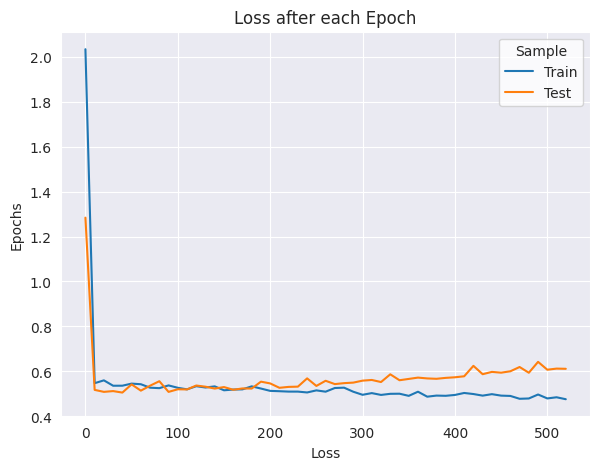

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.savefig('/content/loss_acc.jpg', quality=100)

In [ ]:
df_2023 = pd.read_csv('/content/US_open_pred_.csv')
df_raw = pd.read_csv('/content/combined_raw_data_1.csv')

df_2023['Date'] = '2023/05/29'
df_2023['Surface'] = 'Hard'
df_2023['diff_rank'] = df_2023['player_0_rank'] - df_2023['player_1_rank']

<ipython-input-8-54cbe77bff4d>:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/content/combined_raw_data_1.csv')


In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
def get_player_1_name(winner_name, winner_rank, loser_name, loser_rank):

    if winner_rank < loser_rank:
        return winner_name
    else:
        return loser_name

In [ ]:
def get_player_1_rank(winner_rank, loser_rank):

    if winner_rank < loser_rank:
        return winner_rank
    else:
        return loser_rank


In [ ]:
def get_player_2_name(winner_name, winner_rank, loser_name, loser_rank):

    if winner_rank > loser_rank:
        return winner_name
    else:
        return loser_name


In [ ]:
def get_player_2_rank(winner_rank, loser_rank):

    if winner_rank > loser_rank:
        return winner_rank
    else:
        return loser_rank


In [ ]:
def outcome(winner_rank, loser_rank):

    if winner_rank< loser_rank:
        return 0
    else:
        return 1

In [ ]:
def get_player_1_odd(winner_odd, winner_rank, loser_odd, loser_rank):

    if winner_rank < loser_rank:
        return winner_odd
    else:
        return loser_odd

In [ ]:
def get_player_2_odd(winner_odd, winner_rank, loser_odd, loser_rank):

    if winner_rank > loser_rank:
        return winner_odd
    else:
        return loser_odd

In [ ]:
def subtract_days(date_string, num_days):

    date_temp = (datetime.strptime(date_string, '%Y/%m/%d') - timedelta(days=num_days))
    return date_temp.strftime("%Y/%m/%d")

In [ ]:
def winning_percentage(player_id, data,  type1='matches', current_date=None, surface='All', last_n_weeks=0):
    """
    Caculate different player stats
    :param player_id: Name or ID of Player
    :param data: The raw dataframe from http://www.tennis-data.co.uk/alldata.php
    :param type1: Options: ['matches', 'total_matches', 'games', 'matches_5_sets', 'win_or_close_sets']
    :param current_date: Date of match
    :param surface: Surface options: ['All', 'Grass', 'Hard', 'Clay']
    :param last_n_weeks: Get stats from the past n weeks
    :return: Returns the players Stat for the specified parameters.
    """
    data = data[data['Date'] < current_date]

    if surface!='All':
        data = data[data['Surface'] == surface]

    if last_n_weeks>0:
        last_date = subtract_days(current_date, (last_n_weeks * 7))
        data = data[data['Date'] >= last_date]

    if type1 == 'matches':
        wins = (data['Winner'] == player_id).sum()
        loses = (data['Loser'] == player_id).sum()

    elif type1 == 'total_matches':
        return (data['Winner'] == player_id).sum() + (data['Loser'] == player_id).sum()


    elif type1 == 'matches_5_sets':
        wins = ((data['Winner'] == player_id) & (data['best_of_5'] == 1)).sum()
        loses = ((data['Loser'] == player_id) & (data['best_of_5'] == 1)).sum()


    elif type1 == 'games':
        winner_set_list = ['W1', 'W2', 'W3', 'W4', 'W5']
        loser_set_list = ['L1', 'L2', 'L3', 'L4', 'L5']

        wins = data[data['Winner'] == player_id][winner_set_list].values.sum() + data[data['Loser'] == player_id][loser_set_list].values.sum()
        loses = data[data['Loser'] == player_id][winner_set_list].values.sum() + data[data['Winner'] == player_id][loser_set_list].values.sum()


    elif type1 == 'win_or_close_sets':

        wins = 0
        loses = 0

        data_3_set = data[data['best_of_5'] == 0]
        data_5_set = data[data['best_of_5'] == 1]

        for i in range(1, 4):
            wins = wins + ((data_3_set['Winner'] == player_id) & (data_3_set[('W' + str(i))] >= 5)).sum()
            wins = wins + ((data_3_set['Loser'] == player_id) & (data_3_set[('L' + str(i))] >= 5)).sum()
            loses = loses + ((data_3_set['Winner'] == player_id) & (data_3_set[('W' + str(i))] < 5)).sum()
            loses = loses + ((data_3_set['Loser'] == player_id) & (data_3_set[('L' + str(i))] < 5)).sum()

        for i in range(1, 6):
            wins = wins + ((data_5_set['Winner'] == player_id) & (data_5_set[('W' + str(i))] >= 5)).sum()
            wins = wins + ((data_5_set['Loser'] == player_id) & (data_5_set[('L' + str(i))] >= 5)).sum()
            loses = loses + ((data_5_set['Winner'] == player_id) & (data_5_set[('W' + str(i))] < 5)).sum()
            loses = loses + ((data_5_set['Loser'] == player_id) & (data_5_set[('L' + str(i))] < 5)).sum()

    total = wins + loses

    if total <2:
        win_percent = 0

    else:
        win_percent = wins / total
    return win_percent


In [ ]:
def winning_percent_hh(player_name, opponent_name, data, type1='matches', current_date=None, surface='All', last_n_weeks=0):

    data = data[data['Date'] < current_date]

    if surface!='All':
        data = data[data['Surface'] == surface]

    if last_n_weeks>0:
        last_date = subtract_days(current_date, (last_n_weeks * 7))
        data = data[data['Date'] >= last_date]

    if type1 == 'matches':
        wins = ((data['Winner'] == player_name) & (data['Loser'] == opponent_name)).sum()
        loses = ((data['Winner'] == opponent_name) & (data['Loser'] == player_name)).sum()

    elif type1 == 'games':
        winner_set_list = ['W1', 'W2', 'W3', 'W4', 'W5']
        loser_set_list = ['L1', 'L2', 'L3', 'L4', 'L5']

        wins = data[(data['Winner'] == player_name) & (data['Loser'] == opponent_name)][winner_set_list].values.sum() + \
               data[(data['Winner'] == opponent_name) & (data['Loser'] == player_name)][loser_set_list].values.sum()

        loses = data[(data['Winner'] == opponent_name) & (data['Loser'] == player_name)][winner_set_list].values.sum() + \
                data[(data['Winner'] == player_name) & (data['Loser'] == opponent_name)][loser_set_list].values.sum()

    total = wins + loses

    if total == 0:
        win_percent = 0

    else:
        win_percent = wins / total
    return win_percent

In [ ]:
def create_features(df_combined, df):



    print('Creating Player Career Stats All Surface')

    df_combined.loc[:, 'player_0_match_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches', current_date=row['Date'], last_n_weeks=0),
        axis=1)
    df_combined.loc[:, 'player_1_match_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches', current_date=row['Date'], last_n_weeks=0),
        axis=1)

    df_combined.loc[:, 'player_0_games_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='games', current_date=row['Date'], last_n_weeks=0),
        axis=1)
    df_combined.loc[:, 'player_1_games_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='games', current_date=row['Date'], last_n_weeks=0),
        axis=1)

    df_combined.loc[:, 'player_0_5_set_match_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches_5_sets', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_5_set_match_win_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches_5_sets', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_close_sets_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_close_sets_percent'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)



    print('Creating Player Career Stats on Hard')

    df_combined.loc[:, 'player_0_match_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_match_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_games_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='games', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_games_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='games', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_5_set_match_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches_5_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_5_set_match_win_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches_5_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_close_sets_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_close_sets_percent_hard'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=0), axis=1)



    print('Creating Player Career Stats All Surface Last 52 Weeks')

    df_combined.loc[:, 'player_0_match_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches', current_date=row['Date'], last_n_weeks=52),
        axis=1)
    df_combined.loc[:, 'player_1_match_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches', current_date=row['Date'], last_n_weeks=52),
        axis=1)

    df_combined.loc[:, 'player_0_games_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='games', current_date=row['Date'], last_n_weeks=52),
        axis=1)
    df_combined.loc[:, 'player_1_games_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='games', current_date=row['Date'], last_n_weeks=52),
        axis=1)

    df_combined.loc[:, 'player_0_5_set_match_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches_5_sets', current_date=row['Date'],
                                       last_n_weeks=52), axis=1)
    df_combined.loc[:, 'player_1_5_set_match_win_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches_5_sets', current_date=row['Date'],
                                       last_n_weeks=52), axis=1)

    df_combined.loc[:, 'player_0_close_sets_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       last_n_weeks=52), axis=1)
    df_combined.loc[:, 'player_1_close_sets_percent_52'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       last_n_weeks=52), axis=1)



    print('Creating Player Career Stats on hard Last 60 Weeks')

    df_combined.loc[:, 'player_0_match_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)
    df_combined.loc[:, 'player_1_match_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)

    df_combined.loc[:, 'player_0_games_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='games', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)
    df_combined.loc[:, 'player_1_games_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='games', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)

    df_combined.loc[:, 'player_0_5_set_match_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='matches_5_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)
    df_combined.loc[:, 'player_1_5_set_match_win_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='matches_5_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)

    df_combined.loc[:, 'player_0_close_sets_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_0'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)
    df_combined.loc[:, 'player_1_close_sets_percent_hard_60'] = df_combined.apply(
        lambda row: winning_percentage(row['player_1'], df, type1='win_or_close_sets', current_date=row['Date'],
                                       surface=row['Surface'], last_n_weeks=60), axis=1)



    print('Creating Player Head to Head Career Stats All Surface')

    df_combined.loc[:, 'player_0_match_win_percent_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_0'], row['player_1'], df, type1='matches', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_match_win_percent_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_1'], row['player_0'], df, type1='matches', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_games_win_percent_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_0'], row['player_1'], df, type1='games', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_games_win_percent_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_1'], row['player_0'], df, type1='games', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)



    print('Creating Player Head to Head Career Stats On Hard')

    df_combined.loc[:, 'player_0_match_win_percent_hard_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_0'], row['player_1'], df, type1='matches', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_match_win_percent_hard_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_1'], row['player_0'], df, type1='matches', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)

    df_combined.loc[:, 'player_0_games_win_percent_hard_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_0'], row['player_1'], df, type1='games', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)
    df_combined.loc[:, 'player_1_games_win_percent_hard_hh'] = df_combined.apply(
        lambda row: winning_percent_hh(row['player_1'], row['player_0'], df, type1='games', current_date=row['Date'],
                                       last_n_weeks=0), axis=1)



    print('Creating Difference Variables')

    df_combined.loc[:, 'diff_match_win_percent'] = df_combined['player_0_match_win_percent'] - df_combined[
        'player_1_match_win_percent']
    df_combined.loc[:, 'diff_games_win_percent'] = df_combined['player_0_games_win_percent'] - df_combined[
        'player_1_games_win_percent']
    df_combined.loc[:, 'diff_5_set_match_win_percent'] = df_combined['player_0_5_set_match_win_percent'] - df_combined[
        'player_1_5_set_match_win_percent']
    df_combined.loc[:, 'diff_close_sets_percent'] = df_combined['player_0_close_sets_percent'] - df_combined[
        'player_1_close_sets_percent']

    df_combined.loc[:, 'diff_match_win_percent_hard'] = df_combined['player_0_match_win_percent_hard'] - df_combined[
        'player_1_match_win_percent_hard']
    df_combined.loc[:, 'diff_games_win_percent_hard'] = df_combined['player_0_games_win_percent_hard'] - df_combined[
        'player_1_games_win_percent_hard']
    df_combined.loc[:, 'diff_5_set_match_win_percent_hard'] = df_combined['player_0_5_set_match_win_percent_hard'] - \
                                                               df_combined['player_1_5_set_match_win_percent_hard']
    df_combined.loc[:, 'diff_close_sets_percent_hard'] = df_combined['player_0_close_sets_percent_hard'] - \
                                                          df_combined['player_1_close_sets_percent_hard']

    df_combined.loc[:, 'diff_match_win_percent_52'] = df_combined['player_0_match_win_percent_52'] - df_combined[
        'player_1_match_win_percent_52']
    df_combined.loc[:, 'diff_games_win_percent_52'] = df_combined['player_0_games_win_percent_52'] - df_combined[
        'player_1_games_win_percent_52']
    df_combined.loc[:, 'diff_5_set_match_win_percent_52'] = df_combined['player_0_5_set_match_win_percent_52'] - \
                                                            df_combined['player_1_5_set_match_win_percent_52']
    df_combined.loc[:, 'diff_close_sets_percent_52'] = df_combined['player_0_close_sets_percent_52'] - df_combined[
        'player_1_close_sets_percent_52']

    df_combined.loc[:, 'diff_match_win_percent_hard_60'] = df_combined['player_0_match_win_percent_hard_60'] - \
                                                            df_combined['player_1_match_win_percent_hard_60']
    df_combined.loc[:, 'diff_games_win_percent_hard_60'] = df_combined['player_0_games_win_percent_hard_60'] - \
                                                            df_combined['player_1_games_win_percent_hard_60']
    df_combined.loc[:, 'diff_5_set_match_win_percent_hard_60'] = df_combined[
                                                                      'player_0_5_set_match_win_percent_hard_60'] - \
                                                                  df_combined[
                                                                      'player_1_5_set_match_win_percent_hard_60']
    df_combined.loc[:, 'diff_close_sets_percent_hard_60'] = df_combined['player_0_close_sets_percent_hard_60'] - \
                                                             df_combined['player_1_close_sets_percent_hard_60']

    df_combined.loc[:, 'diff_match_win_percent_hh'] = df_combined['player_0_match_win_percent_hh'] - df_combined[
        'player_1_match_win_percent_hh']
    df_combined.loc[:, 'diff_games_win_percent_hh'] = df_combined['player_0_games_win_percent_hh'] - df_combined[
        'player_1_games_win_percent_hh']

    df_combined.loc[:, 'diff_match_win_percent_hard_hh'] = df_combined['player_0_match_win_percent_hard_hh'] - \
                                                            df_combined['player_1_match_win_percent_hard_hh']
    df_combined.loc[:, 'diff_games_win_percent_hard_hh'] = df_combined['player_0_games_win_percent_hard_hh'] - \
                                                            df_combined['player_1_games_win_percent_hard_hh']

    return df_combined


In [ ]:
df_2023 = create_features(df_2023, df_raw)

Creating Player Career Stats All Surface
Creating Player Career Stats on Hard
Creating Player Career Stats All Surface Last 52 Weeks


<ipython-input-20-eafc8c496a0f>:71: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'player_0_match_win_percent_52'] = df_combined.apply(
<ipython-input-20-eafc8c496a0f>:74: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'player_1_match_win_percent_52'] = df_combined.apply(
<ipython-input-20-eafc8c496a0f>:78: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i

Creating Player Career Stats on hard Last 60 Weeks


<ipython-input-20-eafc8c496a0f>:103: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'player_0_match_win_percent_hard_60'] = df_combined.apply(
<ipython-input-20-eafc8c496a0f>:106: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'player_1_match_win_percent_hard_60'] = df_combined.apply(
<ipython-input-20-eafc8c496a0f>:110: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df

Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Hard
Creating Difference Variables


<ipython-input-20-eafc8c496a0f>:189: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'diff_match_win_percent_52'] = df_combined['player_0_match_win_percent_52'] - df_combined[
<ipython-input-20-eafc8c496a0f>:191: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, 'diff_games_win_percent_52'] = df_combined['player_0_games_win_percent_52'] - df_combined[
<ipython-input-20-eafc8c496a0f>:193: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always

In [ ]:
features_16 = df_2023[features_list]

predict_x = saved_model.predict(features_16)
df_2023['prediction'] = np.argmax(predict_x,axis=1)
df_2023['probability'] = 1 - np.abs(df_2023.prediction - saved_model.predict(features_16).flatten())
df_2023[['Round', 'player_0', 'player_1', 'prediction', 'probability']]


72/72 [==============================] - 0s 3ms/step


,Round,player_0,player_1,prediction,probability
0,1st Round,Massu N.,Gambill J.M.,0,0.675090
1,1st Round,Gaudio G.,Baker B.,0,0.730005
2,1st Round,Ljubicic I.,Summerer T.,0,0.852941
3,1st Round,Mello R.,Monaco J.,0,0.513035
4,1st Round,Malisse X.,Hernych J.,0,0.625847
...,...,...,...,...,...
2273,Quarterfinals,Medvedev D.,Rublev A.,0,0.647581
2274,Quarterfinals,Alcaraz C.,Zverev A.,0,0.451317
2275,Semifinals,Djokovic N.,Shelton B.,0,0.686219
2276,Semifinals,Alcaraz C.,Medvedev D.,0,0.466384
